<a href="https://colab.research.google.com/github/vishoov/s-p500/blob/main/sp500log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression


In [232]:
df=yf.download('^GSPC', start='2010-01-01')

[*********************100%%**********************]  1 of 1 completed


In [233]:
df['ret']= df.Close.pct_change()

In [234]:
df

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882
...,...,...,...,...,...,...,...
2024-08-15,5501.129883,5546.229980,5501.129883,5543.220215,5543.220215,3723310000,0.016133
2024-08-16,5530.500000,5561.979980,5525.169922,5554.250000,5554.250000,3357690000,0.001990
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000,0.009722


In [235]:
def lagit(df, lags):
  for i in range (1, lags+1):
    df['Lag_'+str(i)]= df.ret.shift(i)
  return ['Lag_'+str(i) for i in range(1, lags+1)]

In [236]:
lagit(df, 2)

['Lag_1', 'Lag_2']

In [237]:
df['direction']=np.where(df.ret>0, 1, 0)

In [238]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction
Date,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,0
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1
...,...,...,...,...,...,...,...,...,...,...
2024-08-15,5501.129883,5546.229980,5501.129883,5543.220215,5543.220215,3723310000,0.016133,0.003824,0.016848,1
2024-08-16,5530.500000,5561.979980,5525.169922,5554.250000,5554.250000,3357690000,0.001990,0.016133,0.003824,1
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000,0.009722,0.001990,0.016133,1


In [239]:
df.direction.value_counts()

,count
direction,
1,2005
0,1678


In [240]:
features= lagit(df, 3)

In [241]:
features

['Lag_1', 'Lag_2', 'Lag_3']

In [242]:
df.dropna(inplace=True)

In [243]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3
Date,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-15,5501.129883,5546.229980,5501.129883,5543.220215,5543.220215,3723310000,0.016133,0.003824,0.016848,1,0.000043
2024-08-16,5530.500000,5561.979980,5525.169922,5554.250000,5554.250000,3357690000,0.001990,0.016133,0.003824,1,0.016848
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000,0.009722,0.001990,0.016133,1,0.003824


In [244]:
x=df[features]

In [245]:
y=df['direction']

In [246]:
model = LogisticRegression(class_weight='balanced')

In [247]:
model.fit(x,y)

LogisticRegression(class_weight='balanced')

In [248]:
df['prediction_LR']=model.predict(x)

In [249]:
df['strat']=df['prediction_LR']*df.ret

In [250]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_LR,strat
Date,,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116,0,0.000000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546,0,0.000000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0,-0.000000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1,0.008326
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-15,5501.129883,5546.229980,5501.129883,5543.220215,5543.220215,3723310000,0.016133,0.003824,0.016848,1,0.000043,1,0.016133
2024-08-16,5530.500000,5561.979980,5525.169922,5554.250000,5554.250000,3357690000,0.001990,0.016133,0.003824,1,0.016848,0,0.000000
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000,0.009722,0.001990,0.016133,1,0.003824,1,0.009722


In [251]:
(df[['strat', 'ret']]+1).cumprod()

,strat,ret
Date,,
2010-01-08,1.000000,1.002882
2010-01-11,1.000000,1.004634
2010-01-12,1.000000,0.995209
2010-01-13,1.008326,1.003495
2010-01-14,1.008326,1.005930
...,...,...
2024-08-15,5.536130,4.855276
2024-08-16,5.536130,4.864937
2024-08-19,5.589954,4.912236


<Axes: xlabel='Date'>

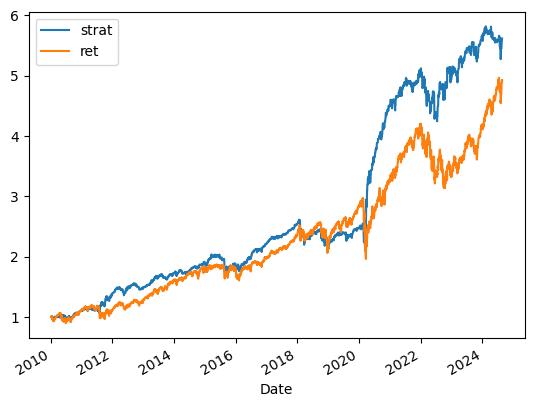

In [252]:
(df[['strat', 'ret']]+1).cumprod().plot()

In [253]:
from sklearn.model_selection import train_test_split


In [254]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, shuffle=False)

In [255]:
x

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2024-08-15,0.003824,0.016848,0.000043
2024-08-16,0.016133,0.003824,0.016848
2024-08-19,0.001990,0.016133,0.003824


In [256]:
x_train

,Lag_1,Lag_2,Lag_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2018-10-08,-0.005528,-0.008169,0.000712
2018-10-09,-0.000395,-0.005528,-0.008169
2018-10-10,-0.001418,-0.000395,-0.005528


In [257]:
x_test

,Lag_1,Lag_2,Lag_3
Date,,,
2018-10-15,0.014206,-0.020573,-0.032864
2018-10-16,-0.005905,0.014206,-0.020573
2018-10-17,0.021496,-0.005905,0.014206
2018-10-18,-0.000253,0.021496,-0.005905
2018-10-19,-0.014392,-0.000253,0.021496
...,...,...,...
2024-08-15,0.003824,0.016848,0.000043
2024-08-16,0.016133,0.003824,0.016848
2024-08-19,0.001990,0.016133,0.003824


In [258]:
y_test

,direction
Date,
2018-10-15,0
2018-10-16,1
2018-10-17,0
2018-10-18,0
2018-10-19,0
...,...
2024-08-15,1
2024-08-16,1
2024-08-19,1


In [259]:
y_train

,direction
Date,
2010-01-08,1
2010-01-11,1
2010-01-12,0
2010-01-13,1
2010-01-14,1
...,...
2018-10-08,0
2018-10-09,0
2018-10-10,0


In [260]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [261]:
x_test['prediction_LR']=model.predict(x_test)

In [262]:
x_test['ret']=df.ret[x_test.index[0]:]

In [263]:
x_test['strat']=x_test['prediction_LR']*x_test.ret

In [264]:
(x_test[['strat', 'ret']]+1).cumprod()-1

,strat,ret
Date,,
2018-10-15,0.000000,-0.005905
2018-10-16,0.021496,0.015464
2018-10-17,0.021496,0.015207
2018-10-18,0.006794,0.000596
2018-10-19,0.006431,0.000235
...,...,...
2024-08-15,1.470444,1.003238
2024-08-16,1.470444,1.007224
2024-08-19,1.494462,1.026739


<Axes: xlabel='Date'>

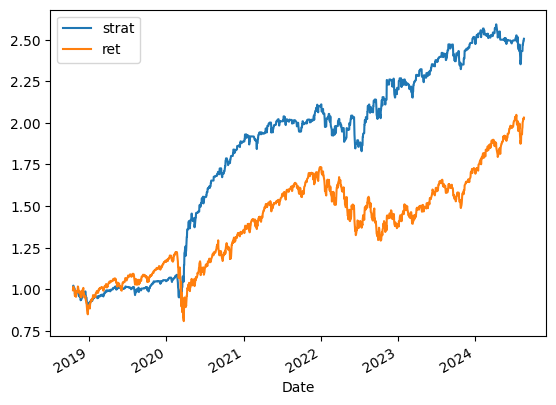

In [265]:
(x_test[['strat', 'ret']]+1).cumprod().plot()

In [266]:
(x_test.tail(50)[['strat', 'ret']]+1)

,strat,ret
Date,,
2024-06-11,1.000000,1.002710
2024-06-12,1.000000,1.008504
2024-06-13,1.000000,1.002345
2024-06-14,1.000000,0.999606
2024-06-17,1.000000,1.007664
2024-06-18,1.000000,1.002521
2024-06-20,0.997474,0.997474
2024-06-21,0.998438,0.998438
2024-06-24,0.996935,0.996935


In [267]:
from sklearn.metrics import classification_report
print(classification_report(df['direction'], df['prediction_LR']))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50      1677
           1       0.56      0.50      0.53      2002

    accuracy                           0.52      3679
   macro avg       0.52      0.52      0.52      3679
weighted avg       0.52      0.52      0.52      3679



In [268]:
!pip install ta


In [269]:
import yfinance as yf
import numpy as np
import pandas as pd

# Download SP500 data
df = yf.download('^GSPC', start='2010-01-01')

# Calculate daily returns
df['ret'] = df['Close'].pct_change()

# Calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df[['RSI']].dropna()

# Apply function
rsi_df = calculate_rsi(df)
print(rsi_df.head())


[*********************100%%**********************]  1 of 1 completed

                  RSI
Date                 
2010-01-22  33.114902
2010-01-25  35.756431
2010-01-26  32.701444
2010-01-27  35.086501
2010-01-28  29.776400


In [270]:
import yfinance as yf
import numpy as np
import pandas as pd

# Download SP500 data
df = yf.download('^GSPC', start='2010-01-01')

# Calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['BollingerHband'] = rolling_mean + (rolling_std * 2)
    df['BollingerLband'] = rolling_mean - (rolling_std * 2)
    return df[['BollingerHband', 'BollingerLband']].dropna()

# Apply function
bollinger_bands_df = calculate_bollinger_bands(df)
print(bollinger_bands_df.head())


[*********************100%%**********************]  1 of 1 completed

            BollingerHband  BollingerLband
Date                                      
2010-02-01     1173.533855     1070.190144
2010-02-02     1172.407574     1068.349420
2010-02-03     1170.840618     1065.992378
2010-02-04     1171.818020     1057.611973
2010-02-05     1170.465503     1051.414489


In [271]:


# Calculate ATR
def calculate_atr(df, window=14):
    high_low = df['High'] - df['Low']
    high_close = abs(df['High'] - df['Close'].shift(1))
    low_close = abs(df['Low'] - df['Close'].shift(1))
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['ATR'] = tr.rolling(window=window).mean()
    return df[['ATR']].dropna()

# Apply function
atr_df = calculate_atr(df)
print(atr_df.head())


                  ATR
Date                 
2010-01-22  14.311401
2010-01-25  13.875689
2010-01-26  14.365688
2010-01-27  15.162833
2010-01-28  15.921404


In [272]:
# Calculate MACD
def calculate_macd(df):
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['MACDSignal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACDDiff'] = df['MACD'] - df['MACDSignal']
    return df[['MACD', 'MACDSignal', 'MACDDiff']].dropna()

# Apply function
macd_df = calculate_macd(df)
print(macd_df.head())


                MACD  MACDSignal  MACDDiff
Date                                      
2010-01-04  0.000000    0.000000  0.000000
2010-01-05  0.281598    0.056320  0.225278
2010-01-06  0.548472    0.154750  0.393722
2010-01-07  1.114268    0.346654  0.767615
2010-01-08  1.807311    0.638785  1.168526


In [273]:

# Calculate Dollar Volume
def calculate_dollar_volume(df):
    df['DollarVolume'] = df['Close'] * df['Volume']
    return df[['DollarVolume']].dropna()

# Apply function
dollar_volume_df = calculate_dollar_volume(df)
print(dollar_volume_df.head())


            DollarVolume
Date                    
2010-01-04  4.522216e+12
2010-01-05  2.831094e+12
2010-01-06  5.654611e+12
2010-01-07  6.017482e+12
2010-01-08  5.025993e+12
